# Chapter 1: Computing with Python

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://www.apress.com/us/book/9781484242452) (ISBN 978-1-484242-45-2).

## Interpreter

In [1]:
%%writefile hello.py
print("Hello from Python!")

Overwriting hello.py


In [2]:
!python hello.py

Hello from Python!


In [3]:
!python --version

Python 3.7.6


## Input and output caching

In [4]:
3 * 3

9

In [5]:
In[1]

'get_ipython().run_cell_magic(\'writefile\', \'hello.py\', \'print("Hello from Python!")\\n\')'

In [6]:
Out[1]

KeyError: 1

In [7]:
In

['',
 'get_ipython().run_cell_magic(\'writefile\', \'hello.py\', \'print("Hello from Python!")\\n\')',
 "get_ipython().system('python hello.py')",
 "get_ipython().system('python --version')",
 '3 * 3',
 'In[1]',
 'Out[1]',
 'In']

In [8]:
Out

{4: 9,
 5: 'get_ipython().run_cell_magic(\'writefile\', \'hello.py\', \'print("Hello from Python!")\\n\')',
 7: ['',
  'get_ipython().run_cell_magic(\'writefile\', \'hello.py\', \'print("Hello from Python!")\\n\')',
  "get_ipython().system('python hello.py')",
  "get_ipython().system('python --version')",
  '3 * 3',
  'In[1]',
  'Out[1]',
  'In',
  'Out']}

In [9]:
1+2

3

In [10]:
1+2;

In [11]:
x = 1

In [12]:
x = 2; x

2

## Documentation

In [13]:
import os

In [14]:
# try os.w<TAB>

In [15]:
import math

In [16]:
math.cos?

Signature: math.cos(x, /)
Docstring: Return the cosine of x (measured in radians).
Type:      builtin_function_or_method


## Interaction with System Shell

In [17]:
!touch file1.py file2.py file3.py

In [18]:
!ls file*

file1.py file2.py file3.py


In [19]:
files = !ls file*

In [20]:
len(files)

3

In [21]:
files

['file1.py', 'file2.py', 'file3.py']

In [22]:
file = "file1.py"

In [23]:
!ls -l $file

-rw-r--r--  1 Giwrgakis  staff  0 Apr  5 19:49 file1.py


## Running scripts from the IPython console

In [24]:
%%writefile fib.py

def fib(N): 
    """ 
    Return a list of the first N Fibonacci numbers.
    """ 
    f0, f1 = 0, 1
    f = [1] * N
    for n in range(1, N):
        f[n] = f0 + f1
        f0, f1 = f1, f[n]

    return f

print(fib(10))

Overwriting fib.py


In [25]:
!python fib.py

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [26]:
%run fib.py

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [27]:
fib(6)

[1, 1, 2, 3, 5, 8]

## Debugger

In [28]:
fib(1.0)

TypeError: can't multiply sequence by non-int of type 'float'

In [29]:
#%debug

## Timing and profiling code

In [30]:
%timeit fib(100)

9.55 µs ± 280 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [31]:
result = %time fib(100)

CPU times: user 14 µs, sys: 3 µs, total: 17 µs
Wall time: 19.1 µs


In [32]:
len(result)

100

In [33]:
import numpy as np

def random_walker_max_distance(M, N):
    """
    Simulate N random walkers taking M steps, and return the largest distance
    from the starting point achieved by any of the random walkers.
    """
    trajectories = [np.random.randn(M).cumsum() for _ in range(N)]
    return np.max(np.abs(trajectories))

In [34]:
%prun random_walker_max_distance(400, 10000)

         20013 function calls in 0.229 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    0.134    0.000    0.134    0.000 {method 'randn' of 'numpy.random.mtrand.RandomState' objects}
    10000    0.040    0.000    0.040    0.000 {method 'cumsum' of 'numpy.ndarray' objects}
        1    0.038    0.038    0.224    0.224 <ipython-input-33-a0ebffe020ed>:3(random_walker_max_distance)
        1    0.008    0.008    0.183    0.183 <ipython-input-33-a0ebffe020ed>:8(<listcomp>)
        1    0.006    0.006    0.229    0.229 <string>:1(<module>)
        1    0.003    0.003    0.003    0.003 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    0.229    0.229 {built-in method builtins.exec}
        1    0.000    0.000    0.003    0.003 fromnumeric.py:73(_wrapreduction)
        1    0.000    0.000    0.003    0.003 <__array_function__ internals>:2(amax)
        1    0.000    0.000    0.003    0.003 fromnu

## Jupyter notebook

In [35]:
from IPython.display import display, Image, HTML, Math

In [36]:
Image(url='http://python.org/images/python-logo.gif')

In [37]:
import scipy, numpy, matplotlib
modules = [numpy, matplotlib, scipy]
row = "<tr> <td>%s</td> <td>%s</td> </tr>"
rows = "\n".join([row % (module.__name__, module.__version__) for module in modules])
s = "<table> <tr><th>Library</th><th>Version</th> </tr> %s</table>" % rows

In [38]:
s

'<table> <tr><th>Library</th><th>Version</th> </tr> <tr> <td>numpy</td> <td>1.18.2</td> </tr>\n<tr> <td>matplotlib</td> <td>3.2.1</td> </tr>\n<tr> <td>scipy</td> <td>1.4.1</td> </tr></table>'

In [39]:
HTML(s)

Library,Version
numpy,1.18.2
matplotlib,3.2.1
scipy,1.4.1


In [40]:
class HTMLDisplayer(object):
    def __init__(self, code):
        self.code = code
    
    def _repr_html_(self):
        return self.code

In [41]:
HTMLDisplayer(s)

Library,Version
numpy,1.18.2
matplotlib,3.2.1
scipy,1.4.1


In [42]:
Math(r'\hat{H} = -\frac{1}{2}\epsilon \hat{\sigma}_z-\frac{1}{2}\delta \hat{\sigma}_x')

<IPython.core.display.Math object>

In [43]:
class QubitHamiltonian(object):
    def __init__(self, epsilon, delta):
        self.epsilon = epsilon
        self.delta = delta

    def _repr_latex_(self):
        return "$\hat{H} = -%.2f\hat{\sigma}_z-%.2f\hat{\sigma}_x$" % \
            (self.epsilon/2, self.delta/2)

In [44]:
QubitHamiltonian(0.5, 0.25)

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def f(mu):
    X = stats.norm(loc=mu, scale=np.sqrt(mu))
    N = stats.poisson(mu)
    x = np.linspace(0, X.ppf(0.999))
    n = np.arange(0, x[-1])

    fig, ax = plt.subplots()
    ax.plot(x, X.pdf(x), color='black', lw=2, label="Normal($\mu=%d, \sigma^2=%d$)" % (mu, mu))
    ax.bar(n, N.pmf(n), align='edge', label=r"Poisson($\lambda=%d$)" % mu)
    ax.set_ylim(0, X.pdf(x).max() * 1.25)
    ax.legend(loc=2, ncol=2)
    plt.close(fig)
    return fig

In [46]:
from ipywidgets import interact
import ipywidgets as widgets

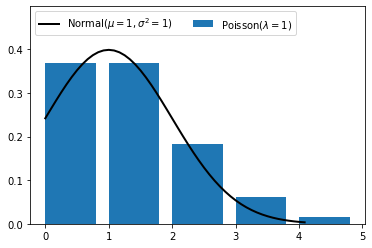

In [47]:
interact(f, mu=widgets.FloatSlider(min=1.0, max=20.0, step=1.0));

## Jupyter nbconvert

In [48]:
!ipython nbconvert --to html ch01-code-listing.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook ch01-code-listing.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata', 'execution_count' were unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][20]['outputs'][0]:
{'execution_count': 16,
 'metadata': {},
 'output_type': 'stream',
 'text': '\x1bSignature:\x1b '
         '\x1bmath\x1b\x1b.\x1b\x1bcos\x1b\x1b...'}
--- Logging error ---
Traceback (most recent call last):
  File "/Users/Giwrgakis/opt/anaconda3/lib/python3.7/site-packages/nbconvert/exporters/exporter.py", line 318, in _preprocess
    nbformat.validate(nbc, relax_add_props=True)
  File "/Users/Giwrgakis/opt/anaconda3/lib/python3.7/site-packages/nbformat/validator.py", line 277, in validate
    r

In [49]:
!ipython nbconvert --to pdf ch01-code-listing.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook ch01-code-listing.ipynb to pdf
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('execution_count', 'metadata' were unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][20]['outputs'][0]:
{'execution_count': 16,
 'metadata': {},
 'output_type': 'stream',
 'text': '\x1bSignature:\x1b '
         '\x1bmath\x1b\x1b.\x1b\x1bcos\x1b\x1b...'}
--- Logging error ---
Traceback (most recent call last):
  File "/Users/Giwrgakis/opt/anaconda3/lib/python3.7/site-packages/nbconvert/exporters/exporter.py", line 318, in _preprocess
    nbformat.validate(nbc, relax_add_props=True)
  File "/Users/Giwrgakis/opt/anaconda3/lib/python3.7/site-packages/nbformat/validator.py", line 277, in validate
    ra

In [50]:
%%writefile custom_template.tplx
((*- extends 'article.tplx' -*))

((* block title *)) \title{Document title} ((* endblock title *))
((* block author *)) \author{Author's Name} ((* endblock author *))

Overwriting custom_template.tplx


In [51]:
!ipython nbconvert ch01-code-listing.ipynb --to pdf --template custom_template.tplx

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook ch01-code-listing.ipynb to pdf
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('execution_count', 'metadata' were unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][20]['outputs'][0]:
{'execution_count': 16,
 'metadata': {},
 'output_type': 'stream',
 'text': '\x1bSignature:\x1b '
         '\x1bmath\x1b\x1b.\x1b\x1bcos\x1b\x1b...'}
--- Logging error ---
Traceback (most recent call last):
  File "/Users/Giwrgakis/opt/anaconda3/lib/python3.7/site-packages/nbconvert/exporters/exporter.py", line 318, in _preprocess
    nbformat.validate(nbc, relax_add_props=True)
  File "/Users/Giwrgakis/opt/anaconda3/lib/python3.7/site-packages/nbformat/validator.py", line 277, in validate
    ra

In [52]:
!ipython nbconvert ch01-code-listing.ipynb --to python

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook ch01-code-listing.ipynb to python
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('execution_count', 'metadata' were unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][20]['outputs'][0]:
{'execution_count': 16,
 'metadata': {},
 'output_type': 'stream',
 'text': '\x1bSignature:\x1b '
         '\x1bmath\x1b\x1b.\x1b\x1bcos\x1b\x1b...'}
--- Logging error ---
Traceback (most recent call last):
  File "/Users/Giwrgakis/opt/anaconda3/lib/python3.7/site-packages/nbconvert/exporters/exporter.py", line 318, in _preprocess
    nbformat.validate(nbc, relax_add_props=True)
  File "/Users/Giwrgakis/opt/anaconda3/lib/python3.7/site-packages/nbformat/validator.py", line 277, in validate
   

# Versions

In [53]:
%reload_ext version_information
%version_information numpy

Software versions
Python 3.7.6 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.13.0
OS Darwin 19.4.0 x86_64 i386 64bit
numpy 1.18.2
Sun Apr 05 19:49:57 2020 EEST